In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Print to logger
print("Beginning Data Retrieval    ")
print("--------------------------- ")

url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# list of city data
city_data = []

# create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list

for i, city in enumerate(cities):
    
    # group the cities in sets of 50 for logging purposes
    if(i % 50 == 0 and i >= 50):
        # reset the group every 50 counts of cities
        set_count += 1
        record_count = 1
    
    # create the endpoint url for each city
    city_url = f"{url}&q={city}"
    
    # log the record and the set number
    print(f"Processing city #{record_count} in group #{set_count} | {city}")
    record_count += 1
    
    try:
        # run API requests and retrieve the data
        city_weather = requests.get(city_url).json()
        
        # add a time delay to avoid blowing out the API key
        time.sleep(2)
        
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data LIST
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        
    except:
        # if an error occurs when making the API call, skip the city
        print(f"{city} has an error. Skipping...")
        pass
    
# Indicate that Data Loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval    
--------------------------- 
Processing city #1 in group #1 | hilo
Processing city #2 in group #1 | rocha
Processing city #3 in group #1 | rock sound
Processing city #4 in group #1 | hualmay
Processing city #5 in group #1 | attawapiskat
attawapiskat has an error. Skipping...
Processing city #6 in group #1 | riyadh
Processing city #7 in group #1 | isangel
Processing city #8 in group #1 | bredasdorp
Processing city #9 in group #1 | madang
Processing city #10 in group #1 | vaini
Processing city #11 in group #1 | nanortalik
Processing city #12 in group #1 | chail
Processing city #13 in group #1 | punta arenas
Processing city #14 in group #1 | hermanus
Processing city #15 in group #1 | trogir
Processing city #16 in group #1 | phuket
Processing city #17 in group #1 | bluff
Processing city #18 in group #1 | xiaoweizhai
Processing city #19 in group #1 | hithadhoo
Processing city #20 in group #1 | illoqqortoormiut
illoqqortoormiut has an error. Skipping...
Processin

Processing city #33 in group #4 | broome
Processing city #34 in group #4 | bloomingdale
Processing city #35 in group #4 | victoria
Processing city #36 in group #4 | wajir
Processing city #37 in group #4 | saldanha
Processing city #38 in group #4 | quang ngai
Processing city #39 in group #4 | puerto ayora
Processing city #40 in group #4 | mys shmidta
mys shmidta has an error. Skipping...
Processing city #41 in group #4 | otjimbingwe
Processing city #42 in group #4 | avarua
Processing city #43 in group #4 | celestun
Processing city #44 in group #4 | san patricio
Processing city #45 in group #4 | saskylakh
Processing city #46 in group #4 | salihorsk
Processing city #47 in group #4 | malanje
Processing city #48 in group #4 | port lincoln
Processing city #49 in group #4 | aracatuba
Processing city #50 in group #4 | pangkalanbuun
Processing city #1 in group #5 | komsomolskiy
Processing city #2 in group #5 | sioux lookout
Processing city #3 in group #5 | warmbad
Processing city #4 in group #5

Processing city #13 in group #8 | kudahuvadhoo
Processing city #14 in group #8 | lixourion
Processing city #15 in group #8 | kilmez
kilmez has an error. Skipping...
Processing city #16 in group #8 | aketi
Processing city #17 in group #8 | saint-joseph
Processing city #18 in group #8 | shingu
Processing city #19 in group #8 | alice springs
Processing city #20 in group #8 | bogorodskoye
Processing city #21 in group #8 | garowe
Processing city #22 in group #8 | suntar
Processing city #23 in group #8 | weihe
Processing city #24 in group #8 | grand gaube
Processing city #25 in group #8 | itarema
Processing city #26 in group #8 | palabuhanratu
palabuhanratu has an error. Skipping...
Processing city #27 in group #8 | cidreira
Processing city #28 in group #8 | imeni poliny osipenko
Processing city #29 in group #8 | bonthe
Processing city #30 in group #8 | steinbach
Processing city #31 in group #8 | tateyama
Processing city #32 in group #8 | rio grande
Processing city #33 in group #8 | faya
Pro

Processing city #36 in group #11 | porto santo
Processing city #37 in group #11 | zomin
Processing city #38 in group #11 | husavik
Processing city #39 in group #11 | severo-yeniseyskiy
Processing city #40 in group #11 | caravelas
Processing city #41 in group #11 | pokhara
Processing city #42 in group #11 | sorland
Processing city #43 in group #11 | luanda
Processing city #44 in group #11 | olafsvik
Processing city #45 in group #11 | yunjinghong
yunjinghong has an error. Skipping...
Processing city #46 in group #11 | christchurch
Processing city #47 in group #11 | biak
Processing city #48 in group #11 | puerto leguizamo
Processing city #49 in group #11 | sri aman
Processing city #50 in group #11 | karaton
Processing city #1 in group #12 | rodrigues alves
Processing city #2 in group #12 | fort saint john
fort saint john has an error. Skipping...
Processing city #3 in group #12 | kulhudhuffushi
Processing city #4 in group #12 | bissora
Processing city #5 in group #12 | senekal
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,74.25,91,100,6.91,US,1667717337
1,rocha,-34.4833,-54.3333,52.52,97,3,4.43,UY,1667717426
2,rock sound,24.9000,-76.2000,80.53,71,2,22.03,BS,1667717429
3,hualmay,-11.0964,-77.6139,61.16,87,7,8.32,PE,1667717431
4,riyadh,24.6877,46.7219,77.14,32,9,14.81,SA,1667717401


In [15]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,19.943082,19.794941,59.206545,71.256944,59.673611,7.836406,1.667718e+09
std,33.165787,90.656998,22.530745,21.241386,40.820597,5.284715,4.797139e+02
min,-54.800000,-179.166700,-24.030000,1.000000,0.000000,0.000000,1.667717e+09
25%,-7.409500,-58.931775,45.377500,61.000000,11.750000,4.000000,1.667718e+09
50%,24.410300,25.150750,65.385000,76.000000,75.000000,6.780000,1.667718e+09
75%,47.602525,100.707400,77.102500,88.000000,100.000000,10.487500,1.667719e+09
max,78.218600,178.416700,94.590000,100.000000,100.000000,39.120000,1.667719e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
# Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index

print(dirty_city_data)

Int64Index([], dtype='int64')


In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,74.25,91,100,6.91,US,1667717337
1,rocha,-34.4833,-54.3333,52.52,97,3,4.43,UY,1667717426
2,rock sound,24.9000,-76.2000,80.53,71,2,22.03,BS,1667717429
3,hualmay,-11.0964,-77.6139,61.16,87,7,8.32,PE,1667717431
4,riyadh,24.6877,46.7219,77.14,32,9,14.81,SA,1667717401


In [18]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

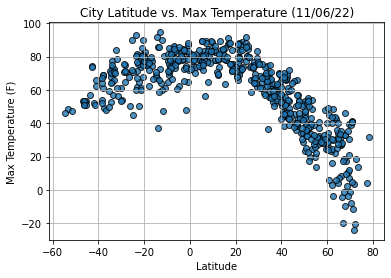

In [20]:
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8,label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

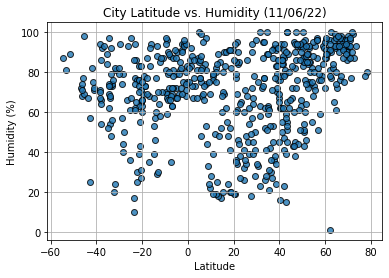

In [21]:
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8,label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

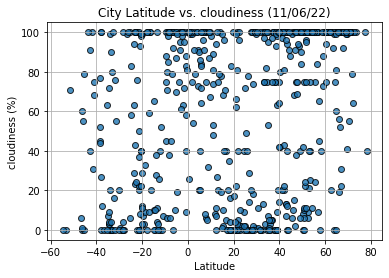

In [22]:
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8,label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

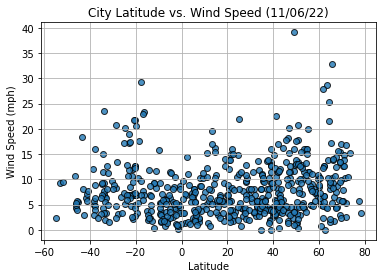

In [24]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8,label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [29]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    #run a regression on the hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "% + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, "r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [30]:
# Create Northern and Southern Hemispher DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7670683671533015


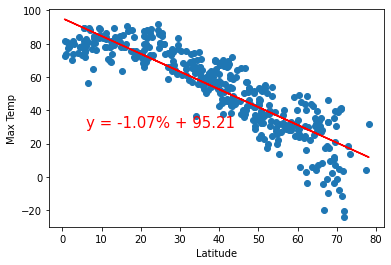

In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.2947629468641987


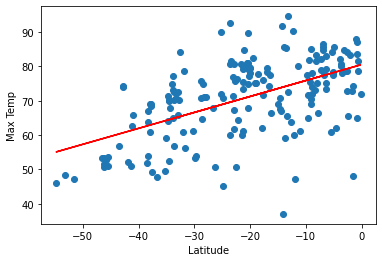

In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6,30))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1200822179223895


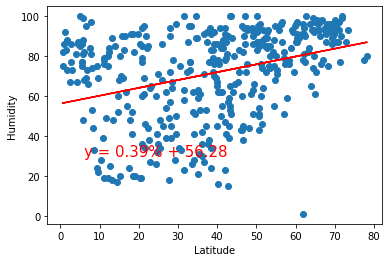

In [33]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (6,30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.013825430706923292


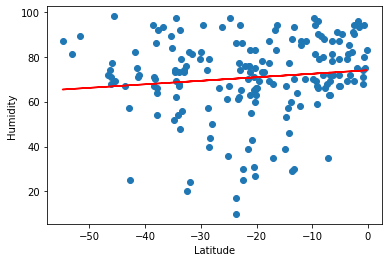

In [34]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (6,30))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06187529704629455


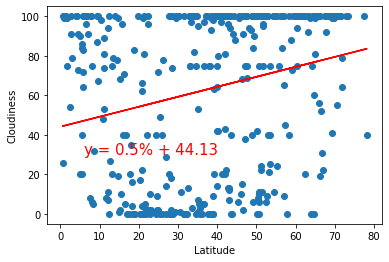

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (6,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09740513338996784


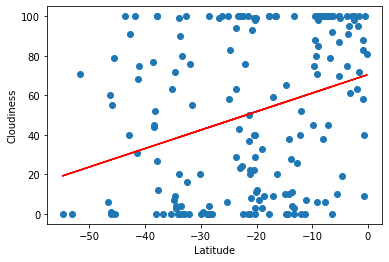

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (6,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.052983165249529666


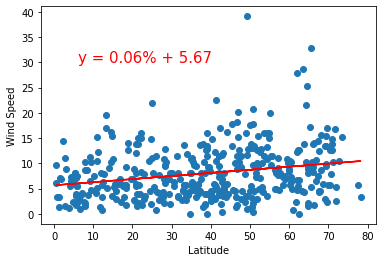

In [38]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (6,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.029920787203186826


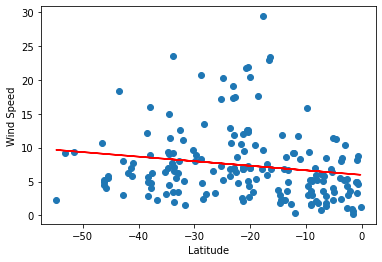

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (6,30))